In [1]:
# api list

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import json
from datetime import datetime, timedelta

from urllib.request import urlopen

In [6]:
response = urlopen('https://api.openf1.org/v1/car_data?driver_number=1&session_key=latest')
throttles_ver = json.loads(response.read().decode('utf-8'))

response = urlopen('https://api.openf1.org/v1/car_data?driver_number=16&session_key=latest')
throttles_lec = json.loads(response.read().decode('utf-8'))

In [7]:
throttles_lec

[{'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 16,
  'date': '2024-03-07T16:45:01.505000',
  'rpm': 0,
  'speed': 0,
  'n_gear': 0,
  'throttle': 0,
  'drs': 0,
  'brake': 0},
 {'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 16,
  'date': '2024-03-07T16:45:01.826000',
  'rpm': 0,
  'speed': 0,
  'n_gear': 0,
  'throttle': 0,
  'drs': 0,
  'brake': 0},
 {'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 16,
  'date': '2024-03-07T16:45:01.986000',
  'rpm': 0,
  'speed': 0,
  'n_gear': 0,
  'throttle': 0,
  'drs': 0,
  'brake': 0},
 {'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 16,
  'date': '2024-03-07T16:45:02.425000',
  'rpm': 0,
  'speed': 0,
  'n_gear': 0,
  'throttle': 0,
  'drs': 0,
  'brake': 0},
 {'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 16,
  'date': '2024-03-07T16:45:02.585000',
  'rpm': 0,
  'speed': 0,
  'n_gear': 0,
  'throttle': 0,
  'drs': 0,
  'brake': 0},
 {'meeting_key': 1230,
  'sess

In [8]:
'''
i=1
laps=[]
while i<25:
    response = urlopen(f'https://api.openf1.org/v1/laps?session_key=latest&driver_number=16&lap_number={i}')
    try:
        laps.append(json.loads(response.read().decode('utf-8'))[0])
    except:
        break
    i+=1
'''
response = urlopen(f'https://api.openf1.org/v1/laps?session_key=latest&driver_number=1&lap_number=5')
laps_ver = json.loads(response.read().decode('utf-8'))

response = urlopen(f'https://api.openf1.org/v1/laps?session_key=latest&driver_number=16&lap_number=9')
laps_lec = json.loads(response.read().decode('utf-8'))

#throttles = json.load(open("/home/gokul/Documents/f1/ver_car.json"))
#laps = json.load(open("/home/gokul/Documents/f1/ver_lap.json"))

In [9]:
laps_ver

[{'meeting_key': 1230,
  'session_key': 9474,
  'driver_number': 1,
  'i1_speed': 288,
  'i2_speed': 324,
  'st_speed': 332,
  'date_start': '2024-03-07T17:18:35.925000',
  'lap_duration': 89.897,
  'is_pit_out_lap': False,
  'duration_sector_1': 32.669,
  'duration_sector_2': 28.601,
  'duration_sector_3': 28.627,
  'segments_sector_1': [2049, 2049, 2048, 2049, 2048, 2049, 2049, 2051, 2048],
  'segments_sector_2': [2049, 2048, 2049, 2049, 2049, 2049, 2048],
  'segments_sector_3': [2048, 2048, 2048, 2048, 2048, 2048, 2049, 2048, 2048],
  'lap_number': 5}]

In [10]:
xax = []
yax_ver = []
yax_lec = []

start_time_lec = datetime.strptime(laps_lec[0]["date_start"], "%Y-%m-%dT%H:%M:%S.%f")
end_time_lec = start_time_lec + timedelta(milliseconds=laps_lec[0]['lap_duration']*1000)

start_time_ver = datetime.strptime(laps_ver[0]["date_start"], "%Y-%m-%dT%H:%M:%S.%f")
end_time_ver = start_time_ver + timedelta(milliseconds=laps_ver[0]['lap_duration']*1000)

In [11]:
start_time_lec, end_time_lec, start_time_ver, end_time_ver 

(datetime.datetime(2024, 3, 7, 17, 34, 49, 309000),
 datetime.datetime(2024, 3, 7, 17, 36, 18, 489000),
 datetime.datetime(2024, 3, 7, 17, 18, 35, 925000),
 datetime.datetime(2024, 3, 7, 17, 20, 5, 822000))

In [12]:
isLap = False
for thr in throttles_ver:
    t = datetime.strptime(thr['date'], "%Y-%m-%dT%H:%M:%S.%f")
    if t >= start_time_ver or isLap:
        isLap = True
        if t <= end_time_ver:
            #xax.append(t)
            yax_ver.append(thr["throttle"])
        else:
            break

isLap = False
for thr in throttles_lec:
    t = datetime.strptime(thr['date'], "%Y-%m-%dT%H:%M:%S.%f")
    if t >= start_time_lec or isLap:
        isLap = True
        if t <= end_time_lec:
            #xax.append(t)
            yax_lec.append(thr["throttle"])
        else:
            break

print(len(yax_ver), len(yax_lec))

336 326


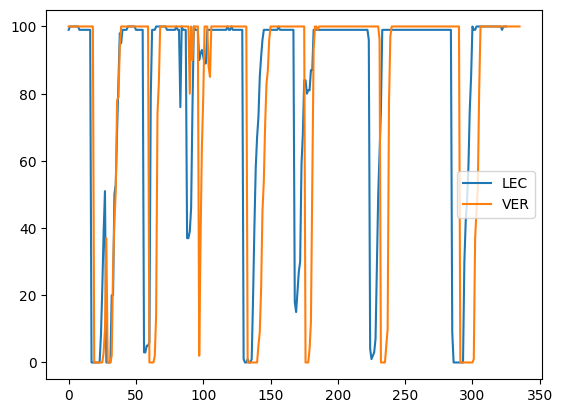

In [13]:
plt.plot(list(range(len(yax_lec))), yax_lec, label="LEC")
plt.plot(list(range(len(yax_ver))), yax_ver, label="VER")
plt.legend()

plt.show()